In [ ]:
### 手順5 --- PandasでJSONを読んでみよう

In [2]:
import pandas as pd
pd.read_json('tweet_fix.json')

,tweet
0,"{'retweeted': False, 'source': '<a href=""http:..."
1,"{'retweeted': False, 'source': '<a href=""http:..."
2,"{'retweeted': False, 'source': '<a href=""http:..."
3,"{'retweeted': False, 'source': '<a href=""http:..."
4,"{'retweeted': False, 'source': '<a href=""http:..."
...,...
428,"{'retweeted': False, 'source': '<a href=""https..."
429,"{'retweeted': False, 'source': '<a href=""https..."
430,"{'retweeted': False, 'source': '<a href=""https..."
431,"{'retweeted': False, 'source': '<a href=""https..."


In [ ]:
# 手順6 --- JSONの特定の項目からDataFrameを作る

In [1]:
import pandas as pd

# Twitterのアーカイブファイルを読む
df = pd.read_json('tweet_fix.json')

# tweet列を抽出しPandasのDataFrameにする
pd.DataFrame(df['tweet'].to_list())


In [ ]:
# 必要な列だけを抽出しよう ---

In [11]:
import pandas as pd
# Twitterのアーカイブファイルを読む --- (※1)
df = pd.read_json('tweet_fix.json')
# 各行にあるtweetを取り出す
df = pd.DataFrame(df.tweet.to_list())

# 必要な列だけを取り出す --- (※2)
df = df[['favorite_count', 'retweet_count', 'full_text', 'created_at']]
df

,favorite_count,retweet_count,full_text,created_at
0,9,8,MP4動画から字幕を抽出したいと思ったので、調べたら、結構簡単にできることが分かったのでまと...,Thu Jan 18 08:34:49 +0000 2018
1,2,7,先日、変体仮名など日本の文字がたくさん追加されたISO/IEC 10646を受けて書いた『ど...,Mon Jan 15 03:13:01 +0000 2018
2,8,2,連載20回目「Python2行でカレンダー」がマイナビニュースで公開されました！Python...,Wed Jan 10 12:39:06 +0000 2018
3,5,6,Mac上のFPC(Free Pascal Compier)を使って、テキスト音楽「サクラ」の...,Mon Jan 08 08:21:48 +0000 2018
4,6,3,さっきの地震びっくりした！でも、今夜一番びっくりしたのは、サーバー移転作業のミスで、日本語プ...,Fri Jan 05 16:08:29 +0000 2018
...,...,...,...,...
428,11,3,教育向け言語LOGOから生まれたタートルグラフィックスで楽しく学ぼう / マイナビ世界の言語...,Mon Jul 11 00:14:42 +0000 2022
429,18,4,ファイル名をランダムに変更して音楽の再生順を変えよう / マイナビなでしこ連載72回目が掲載...,Mon Jul 04 02:14:01 +0000 2022
430,14,2,Pythonでブラウザ自動化 - 画像を丸ごとダウンロードしよう/マイナビ連載93回目が掲載...,Wed Sep 07 05:57:28 +0000 2022
431,8,2,モバイル開発環境について、いいね♥がたくさんついたので、具体的なツールについて書いてみました...,Tue Aug 30 15:06:42 +0000 2022


In [ ]:
# 手順7 --- いいねが50件以上ついた投稿のみを抽出して表示しよう！

In [2]:
import pandas as pd
# Twitterのアーカイブファイルを読む --- (※1)
df = pd.read_json('tweet_fix.json')
df = pd.DataFrame(df.tweet.to_list())
# 必要な列だけを取り出す --- (※2)
df = df[['favorite_count', 'full_text', 'created_at']]

# favorite_countを整数に変換 --- (※3)
df.favorite_count = df.favorite_count.astype('int')
# いいねが50件以上ある投稿を抽出 --- (※4)
df[ df.favorite_count >= 50 ]


,favorite_count,full_text,created_at
57,449,先日ATOKを最新版にしたのだけど、眠い目をこすりながら原稿書いていたら「そろそろ休憩しませ...,Thu Nov 15 15:59:17 +0000 2018
188,116,プログラマーが技術書を出版するときの注意を個人ブログにまとめてみました。印税は何%もらえる?...,Mon Jul 20 08:29:53 +0000 2020
224,283,日本語プログラミング言語「なでしこ」が、来年度の技術・家庭の教科書に載ります！楽しくプログラ...,Wed Sep 16 13:48:22 +0000 2020
378,786,📙著書『Rust 書きかた・作りかた』が明日発売です！🎉入魂の激アツ560ページ+付録PDF...,Thu Jan 20 00:49:20 +0000 2022
432,632,最近のモバイル開発環境。iPhone上のTermiusと折り畳みBluetoothキーボード...,Mon Aug 29 04:55:48 +0000 2022


In [3]:
df.favorite_count >= 50

0      False
1      False
2      False
3      False
4      False
       ...  
428    False
429    False
430    False
431    False
432     True
Name: favorite_count, Length: 433, dtype: bool

In [ ]:
### 手順8 --- 「いいね」の多い順に10件表示してみよう

In [5]:
import pandas as pd
# TwitterのアーカイブJSONを読んでtweetを取り出す --- (※1)
df = pd.read_json('tweet_fix.json')
df = pd.DataFrame(df.tweet.to_list())
# ここで必要な列だけ抽出
df = df[['favorite_count', 'full_text']]

# favorite_countを整数に変換 --- (※2)
df.favorite_count = df.favorite_count.astype('int')

# 「いいね」のランキングを計算し、rank列を生成 --- (※3)
df['rank'] = df.favorite_count.rank(ascending=False)
# ランキング上位10件だけを抽出する --- (※4)
df.sort_values(by=['rank'])[0:10]


,favorite_count,full_text,rank
378,786,📙著書『Rust 書きかた・作りかた』が明日発売です！🎉入魂の激アツ560ページ+付録PDF...,1.0
432,632,最近のモバイル開発環境。iPhone上のTermiusと折り畳みBluetoothキーボード...,2.0
57,449,先日ATOKを最新版にしたのだけど、眠い目をこすりながら原稿書いていたら「そろそろ休憩しませ...,3.0
224,283,日本語プログラミング言語「なでしこ」が、来年度の技術・家庭の教科書に載ります！楽しくプログラ...,4.0
188,116,プログラマーが技術書を出版するときの注意を個人ブログにまとめてみました。印税は何%もらえる?...,5.0
301,46,著書『プログラマーの本気がExcelを覚醒させる 超絶ExcelVBA』の見本が届きました。...,6.0
195,42,お気に入り文書作成ガジェットPomera DM200ではDebian/Linuxが動きます。...,8.0
217,42,拙作『プログラミング言語大全』ですが、コロナ自粛中に発売され残念に思っていましたが、皆さんの...,8.0
424,42,『Power Automate Desktop』の教科書、見本が到着しました!! 来週7/2...,8.0
179,36,苦労して執筆した『プログラミング言語大全(技術評論社)』が先日発売になりました！100以上の...,10.5


In [ ]:
# グラフで
import pandas as pd
# TwitterのアーカイブJSONを読んでtweetを取り出す --- (※1)
df = pd.read_json('tweet_fix.json')
df = pd.DataFrame(df.tweet.to_list())
# ここで必要な列だけ抽出
df = df[['favorite_count', 'full_text']]

# favorite_countを整数に変換 --- (※2)
df.favorite_count = df.favorite_count.astype('int')

# 「いいね」のランキングを計算し、rank列を生成 --- (※3)
df['rank'] = df.favorite_count.rank(ascending=False)
# ランキング上位10件だけを抽出する --- (※4)
df.sort_values(by=['rank'])[0:10]


In [ ]:
###
### 【手順9】 「いいね」獲得数の推移をグラフにしよう
### 

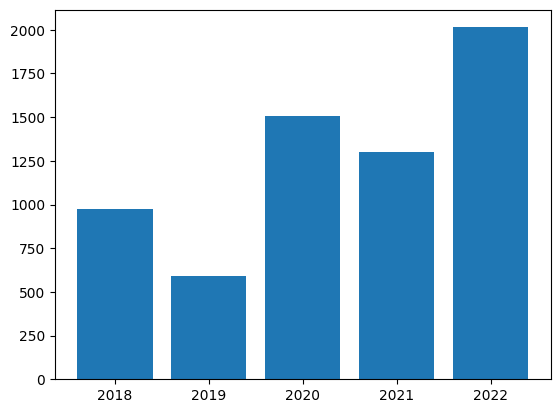

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# TwitterのアーカイブJSONを読んでtweetを取り出す --- (※1)
df = pd.read_json('tweet_fix.json')
df = pd.DataFrame(df.tweet.to_list())
# ここで必要な列だけ抽出
df = df[['favorite_count', 'created_at']]

# favorite_countを整数に変換
df.favorite_count = df.favorite_count.astype('int')
# 日時データを変換 --- (※2)
df.created_at = pd.to_datetime(df.created_at)
df['year'] = df.created_at.dt.year

# 毎年の合計をグラフにする  --- (※3)
df_sum = df.groupby('year').sum()
plt.bar(df_sum.index, df_sum.favorite_count)
plt.show()

In [27]:
df_sum

,favorite_count
year,
2018,977
2019,592
2020,1509
2021,1300
2022,2014


In [ ]:
###
### 【手順10】キーワードを含む投稿のいいね数グラフを描画しよう
###

In [29]:
import pandas as pd
# Twitterのアーカイブファイルを読んで必要な列だけ抽出
df = pd.read_json('tweet_fix.json')
df = pd.DataFrame(df.tweet.to_list())
df = df[["favorite_count", "full_text"]]

#  Pythonを含む投稿を表示 --- (※1)
df[df.full_text.str.contains('Python')]

,favorite_count,full_text
2,8,連載20回目「Python2行でカレンダー」がマイナビニュースで公開されました！Python...
7,5,「ディレクトリ内にある重複ファイルを削除しよう - Python連載25回マイナビ」が公開さ...
10,3,『ついにMacでPython3がデフォルトに?! - Python2と3のどちらを使えば良い...
12,13,科学計算のライブラリも豊富な「Python」マイナビ連載『世界のプログラミング言語』が掲載さ...
13,9,マイナビ連載『PythonでGmailを確認しよう その2』が掲載されました。今回は、Gma...
...,...,...
403,10,JS、C#、Pythonなど複数言語を生成するFlash由来の言語Haxe / マイナビ連載...
413,3,記事を投稿しました！ スクレイピングのメモ [Python] on #Qiita https...
414,9,Pythonのゲーム開発ライブラリPyGameを使ってみよう - Python連載90回目が...
423,10,PythonとGraphvizで簡単 - 手順書グラフを作ろう / マイナビPython連載...


In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
# Twitterのアーカイブファイルを読む
df = pd.read_json('tweet_fix.json')
# 各列にあるtweetを取り出す
df = pd.DataFrame(df.tweet.to_list())
# 必要な列だけ抽出
df = df[["favorite_count",　"full_text"]]
# favorite_countを整数に変換
df.favorite_count = df.favorite_count.astype('int')
#  Pythonを含む投稿についた「いいね」の数を数える
df[df.full_text.str.contains('Python')].favorite_count.sum()

1748

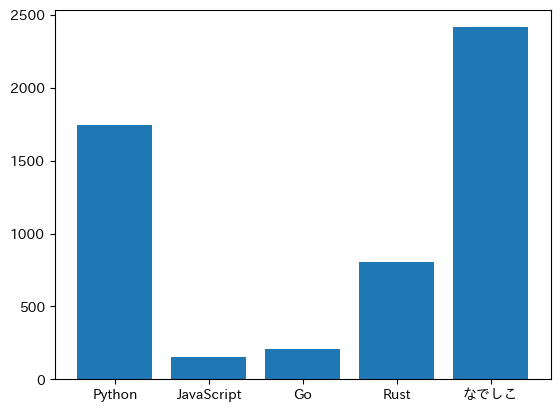

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib

# Twitterのアーカイブファイルを読んで必要な列を抽出
df = pd.read_json('tweet_fix.json')
df = pd.DataFrame(df.tweet.to_list())
df = df[["favorite_count", "full_text"]]
df.favorite_count = df.favorite_count.astype('int')

#  プログラミング言語を含む投稿についた「いいね」の数を数える --- (※1)
labels = ['Python', 'JavaScript', 'Go', 'Rust', 'なでしこ']
# 言語ごとに「いいね」数を集計 --- (※2)
values = []
for lang in labels:
    values.append(df[df.full_text.str.contains(lang)].favorite_count.sum())

# 数えた内容をグラフで表示 --- (※3)
plt.bar(labels, values)
plt.show()


In [ ]:
#
#
#

In [115]:
import pandas as pd
import matplotlib.pyplot as plt
# Twitterのアーカイブファイルを読む
df = pd.read_json('tweet_fix.json')
# 各列にあるtweetを取り出す
df = pd.DataFrame(df.tweet.to_list())
# 必要な列だけ抽出
df = df[["favorite_count", "retweet_count", "full_text"]]
# containsは正規表現の部分マッチである
df[df.full_text.str.contains('[0-9]+回目')]

,favorite_count,retweet_count,full_text
1,2,7,先日、変体仮名など日本の文字がたくさん追加されたISO/IEC 10646を受けて書いた『ど...
2,8,2,連載20回目「Python2行でカレンダー」がマイナビニュースで公開されました！Python...
5,4,2,燃費計算ツールを作ってみよう！ーゼロからはじめてみる日本語プログラミング24回目ーが公開され...
8,2,0,なでしこの連載23回目「自動車で15分の場所、歩くと何分かかる？」が公開されました。タクシー...
10,3,3,『ついにMacでPython3がデフォルトに?! - Python2と3のどちらを使えば良い...
...,...,...,...
423,10,1,PythonとGraphvizで簡単 - 手順書グラフを作ろう / マイナビPython連載...
426,5,2,PowerAutmateでExcelのアンケートを集計しよう/マイナビ業務Hack20回目が...
428,11,3,教育向け言語LOGOから生まれたタートルグラフィックスで楽しく学ぼう / マイナビ世界の言語...
429,18,4,ファイル名をランダムに変更して音楽の再生順を変えよう / マイナビなでしこ連載72回目が掲載...


In [111]:
import pandas as pd
import matplotlib.pyplot as plt
# Twitterのアーカイブファイルを読む
df = pd.read_json('tweet_fix.json')
# 各列にあるtweetを取り出す
df = pd.DataFrame(df.tweet.to_list())
# 必要な列だけ抽出
df = df[["favorite_count", "retweet_count", "full_text"]]
# 正規表現で先頭にマッチするもの - 数字から始まる投稿を抽出
df[df.full_text.str.match('[0-9]+')]

,favorite_count,retweet_count,full_text
26,3,1,9行で住所入力フォームを自動化しようーマイナビ連載ーなでしこ\nhttps://t.co/4...
78,2,0,2019年を有意義にする年間計画表作成アプリを作ろうーマイナビ連載ーいち早く、来年の計画をた...
127,7,0,100個あるWordの契約書の年号を置き換えろと迫られる ! - マイナビ連載4回目が掲載さ...
174,15,6,100行未満かつGo標準ライブラリだけで作る掲示板/マイナビ連載が掲載されました！Go言語で...
232,12,3,2010年に公開し好評を得ていたAndroidの開発フレームワーク『jsWaffle』を最新...
267,5,0,100個あるCSVファイルを結合してExcelに取り込むには？/業務課題をHackせよ!マイ...
321,16,4,550円で電子工作ラズパイピコを始めよう / マイナビPython連載79回目が掲載されまし...
335,12,3,3×3グリッドのアイデア発想ツールをブラウザで作ろう/マイナビJS連載が掲載されました！アイ...
367,18,2,10/27に『やさしくはじめるラズベリー・パイ 改訂2版』がマイナビ出版より発売されます!!...
383,7,1,90日後はいつ？日付計算機を作ろう/マイナビなでしこ連載が掲載されました！日時計算はなでしこ...


In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import re
# Twitterのアーカイブファイルを読む
df = pd.read_json('tweet_fix.json')
# 各列にあるtweetを取り出す
df = pd.DataFrame(df.tweet.to_list())
# 必要な列だけ抽出
df = df[["favorite_count", "retweet_count", "full_text"]]
# 正規表現で部分マッチ - 金額を含む投稿を抽出
df[df.full_text.str.contains('[0-9百千万億]+円')]

,favorite_count,retweet_count,full_text
71,28,10,Pythonを使ったWebサイトは百円で運用できる(その2) - マイナビ連載が掲載されまし...
75,10,0,Pythonを使ったWebサイトは百円で運用できる(その1) - マイナビ連載が掲載されまし...
110,5,4,Galaxy S8でSIMカード取り出そうとしたら、SIMのトレイが折れてしまいました。修理...
150,1,0,マレーシアのLazadaでRM58(1500円)ほどで買ったMIFA A1が届いたので箱を開...
152,6,0,今年に入って何年も前に作ったマレー語の勉強サイトへのアクセスが増えてきた。広告を少し多めにし...
204,0,0,今マレーシアに頑張って行って帰ってくるといくらかかるか、公開されている情報で試算してみました...
306,10,3,ColabのGPU高性能マシンが月1072円で使い放題になっていた件/マイナビPython連...
317,13,0,ラズパイピコと光センサー総額1150円で作る会議室のモニタリングシステムーマイナビPytho...
321,16,4,550円で電子工作ラズパイピコを始めよう / マイナビPython連載79回目が掲載されまし...
404,4,2,自作Slackコマンド作成は簡単! 100円運用でチーム連携を強化しよう / マイナビ #p...


In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
# Twitterのアーカイブファイルを読む
df = pd.read_json('tweet_fix.json')
# 各列にあるtweetを取り出す
df = pd.DataFrame(df.tweet.to_list())
# 必要な列だけ抽出
df = df[["favorite_count", "retweet_count", "full_text"]]
# favorite_countを整数に変換
df.favorite_count = df.favorite_count.astype('int')
df.retweet_count = df.retweet_count.astype('int')
#  「いいね」よりリツイートが多い投稿を抽出
df[df.favorite_count < df.retweet_count]


,favorite_count,retweet_count,full_text
1,2,7,先日、変体仮名など日本の文字がたくさん追加されたISO/IEC 10646を受けて書いた『ど...
3,5,6,Mac上のFPC(Free Pascal Compier)を使って、テキスト音楽「サクラ」の...
34,1,2,『なでしこ連載26回/アナログ時計を作ろう』が掲載されました。プログラミングの練習でよくある...
36,2,4,『長年愛されてきた「Visual Basic」を改めて評価してみよう - マイナビニュース』...
48,2,3,Webのために生まれWebに愛されている言語「PHP」-マイナビニュースが公開されました! ...
62,1,4,音声合成APIで時報アプリを作ろう/マイナビなでしこ連載-掲載されました。Webブラウザがし...
64,1,3,今度の10月21日に、日本語プログラミング言語「なでしこ」で交流会＋懇親会を計画しています。...
73,5,6,久々に、日本語プログラミング言語なでしこv1(Windows版)をアップデートしました。基本...
375,4,11,「部長、Power Automateでクリップボード拡張ツールを作ったよ」/ マイナビ 業務...
389,5,21,「スキャンした100枚の画像が全部横向きに？助けてPower Automate」ーマイナビ連...


In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
# Twitterのアーカイブファイルを読む
df = pd.read_json('tweet_fix.json')
# 各列にあるtweetを取り出す
df = pd.DataFrame(df.tweet.to_list())
# 必要な列だけ抽出
df = df[["favorite_count", "retweet_count", "full_text"]]
# favorite_countを整数に変換
df.favorite_count = df.favorite_count.astype('int')
df.retweet_count = df.retweet_count.astype('int')
#  「いいね」よりリツイートが多い投稿に含まれる英単語を抽出
df[df.favorite_count < df.retweet_count].full_text.str.extract('([a-zA-Z\s]+)')


,0
1,ISO
3,Mac
34,\nhttps
36,Visual Basic
48,Web
62,API
64,\n\n
73,v
375,Power Automate
389,Power Automate


In [155]:
# groupby を使ってみよう
# ---
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
# Twitterのアーカイブファイルを読む
df = pd.read_json('tweet_fix.json')
# 各列にあるtweetを取り出す
df = pd.DataFrame(df.tweet.to_list())
# 必要な列だけ抽出
df = df[["favorite_count", "created_at"]]
# favorite_countを整数に変換
df.favorite_count = df.favorite_count.astype('int')
#  日時形式に変換
df.created_at = pd.to_datetime(df.created_at)
# 各年のトータル「いいね」数を計算してみよう
df['year'] = df.created_at.dt.year
df.groupby('year').sum()

,favorite_count
year,
2018,977
2019,592
2020,1509
2021,1300
2022,2014


In [150]:
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
# Twitterのアーカイブファイルを読む
df = pd.read_json('tweet_fix.json')
# 各列にあるtweetを取り出す
df = pd.DataFrame(df.tweet.to_list())
# 必要な列だけ抽出
df = df[["favorite_count", "retweet_count", "full_text", "created_at"]]
# favorite_countを整数に変換
df.favorite_count = df.favorite_count.astype('int')
df.retweet_count = df.retweet_count.astype('int')
#  日時形式に変換
df.created_at = pd.to_datetime(df.created_at)
df['year'] = df.created_at.dt.year
# 各年ごとの最高の「いいね」がついた投稿を抽出
df.groupby('year').max()

,favorite_count,retweet_count,full_text,created_at
year,,,,
2018,449,344,頻出英単語2000語ゲームを作ってみようーなでしこ連載ー英語学習に活躍\nhttps://t...,2018-12-31 07:04:33+00:00
2019,34,25,開発合宿 in Kota Kinabalu. https://t.co/Yhqb4ByxkX,2019-12-30 10:58:31+00:00
2020,283,201,難解パスワード生成ツールを作ろう/なでしこマイナビ連載第56回が掲載されました。セキュリティ...,2020-12-31 05:39:59+00:00
2021,46,14,電子書籍リーダーで快適に読めるPDFをHTMLから生成しよう / マイナビPython連載8...,2021-12-31 09:05:45+00:00
2022,786,186,📙著書『Rust 書きかた・作りかた』が明日発売です！🎉入魂の激アツ560ページ+付録PDF...,2022-09-07 05:57:28+00:00


In [159]:
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
# Twitterのアーカイブファイルを読む
df = pd.read_json('tweet_fix.json')
# 各列にあるtweetを取り出す
df = pd.DataFrame(df.tweet.to_list())
# 必要な列だけ抽出
df = df[["favorite_count", "created_at"]]
# favorite_countを整数に変換
df.favorite_count = df.favorite_count.astype('int')
#  日時形式に変換
df.created_at = pd.to_datetime(df.created_at)
df['year'] = df.created_at.dt.year
# 各年ごとの個数,平均,合計, 最大値を一度に表示
df.groupby('year').agg(['count', 'mean', 'sum', 'max'])

favorite_count                      
              count       mean   sum  max
year                                     
2018             78  12.525641   977  449
2019             77   7.688312   592   34
2020            108  13.972222  1509  283
2021            116  11.206897  1300   46
2022             54  37.296296  2014  786

In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
# Twitterのアーカイブファイルを読む
df = pd.read_json('tweet_fix.json')
# 各列にあるtweetを取り出す
df = pd.DataFrame(df.tweet.to_list())
# 必要な列だけ抽出
df = df[["favorite_count", "full_text", "created_at"]]
# favorite_countを整数に変換
df.favorite_count = df.favorite_count.astype('int')
#  日時形式に変換
df.created_at = pd.to_datetime(df.created_at)
df['year'] = df.created_at.dt.year
# Pythonを含んだ投稿かどうかでフィルタリング
df = df[df.full_text.str.contains('Python') ]
df.groupby('year').sum()

,favorite_count
year,
2018,256
2019,166
2020,268
2021,192
2022,866
